In [56]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d, interp2d
from scipy.optimize import root
from scipy.special import zeta
from scipy.integrate import quad
from astropy import constants as C
from astropy import units
from astropy.cosmology import Planck15 as cosmo
import matplotlib as mpl
import matplotlib.pyplot as plt
import sympy as sym
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = plt.rcParams['axes.labelsize'] = plt.rcParams['xtick.labelsize'] = plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

In [79]:
r, theta, r_0, l = sym.symbols("r, theta, r_0, l")
r2=r_0**2+l**2-2*sym.cos(theta)*r_0*l
rho=(1/((r)*(r+1)**2)).subs(r, sym.sqrt(r2))
print(rho)

1/((sqrt(l**2 - 2*l*r_0*cos(theta) + r_0**2) + 1)**2*sqrt(l**2 - 2*l*r_0*cos(theta) + r_0**2))


In [80]:
rho2_func=sym.lambdify((l, theta, r_0), rho**2, "numpy")
rho2_func(1, 1, 4)

0.00018234388796246925

In [81]:
c=10
M=10**12*units.M_sun
r_200=(3*M/(4*np.pi*200*cosmo.critical_density0))**(1/3)
r_s=r_200/c
rho_s=M/(4*np.pi*r_s**3*(np.log(1+c)-c/(1+c)))

In [82]:
l_sol=sym.solve(sym.Eq(r2, r**2), l)
l_solm=sym.lambdify((r, theta, r_0),l_sol[0])
l_solp=sym.lambdify((r, theta, r_0),l_sol[1])
theta45=np.deg2rad(45)
r_0val=0.5
l_solp(c,theta45,0.5)

10.347301436246616

In [83]:
l_sol

[r_0*cos(theta) - sqrt(r**2 - r_0**2*sin(theta)**2),
 r_0*cos(theta) + sqrt(r**2 - r_0**2*sin(theta)**2)]

In [90]:
quad(rho2_func, 0, l_solp(c, 0, r_0val), (theta45, r_0val))

(1.3564160184039207, 1.0886978035618782e-08)

In [107]:
@np.vectorize
def dJdO(theta, r_0, c):
    return quad(rho2_func, 0, l_solp(c,theta,r_0), (theta, r_0))[0]
dJdO(theta45,r_0val, c)
theta_max=np.deg2rad(0.5)
quad(lambda theta: 2*np.pi*np.sin(theta)*dJdO(theta, r_0val, c), 0, theta_max)

C:\Users\rafac\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rafac\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  This is separate from the ipykernel package so we can avoid doing imports until


In [117]:
@np.vectorize
def J(theta_max, r_0, c):
    return quad(lambda theta: 2*np.pi*np.sin(theta)*dJdO(theta, r_0val, c), 0, theta_max)[0]
#J(np.deg2rad(0.01), r_0val, c)

C:\Users\rafac\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rafac\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  This is separate from the ipykernel package so we can avoid doing imports until


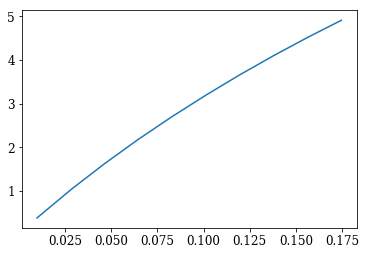

In [119]:
theta2=np.linspace(0.01, np.deg2rad(10), 10)
plt.plot(theta2, J(theta2, r_0val, c))

62755.59809272977


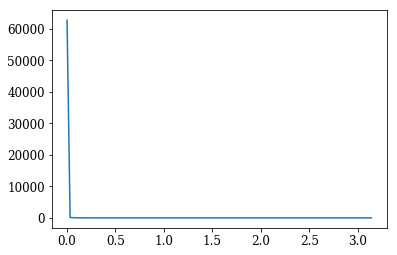

In [114]:
theta1=np.linspace(1e-4, np.pi, 100)
plt.plot(theta1, dJdO(theta1, r_0val, c))

arr = dJdO(theta1, r_0val, c)
print(arr[0])

In [101]:
quad(rho2_func, 0, l_solp(c,1e-4,r_0val), (1e-4, r_0val))

(62755.59809272977, 7.63327807634502e-05)